<a href="https://colab.research.google.com/github/D-kn/Leaf-classification/blob/master/TP_RVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of surface defects of industrial products using the "bag of word" 

model Overview: In this exercise, we will in turn practice the steps to build a machine learning system for the problem of classifying the surface of industrial products: feature extraction, building classification model, and classification. type on actual image. The exercise requires knowledge of Python programming with libraries: OpenCV, scikit-learn, pickle, numpy.

In case you have not installed opencv contrib successfully, run the following commands on the terminal window: pip uninstall opencv-contrib-python pip uninstall opencv-python pip install opencv-python == 3.4.0.12 pip install opencv-contrib-python == 3.4.0.12 pip uninstall numpy pip install numpy == 1.15.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/'My Drive'/Code/Bow

/content/drive/My Drive/Code/Bow



## Check openCV library

## Declare library


In [ ]:
!pip install opencv-contrib-python==4.4.0.44
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pickle
import sklearn

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

## Read image data from folder


In [ ]:
!ls ./Data/

'Anhui Barberry'     'castor aralia'	  deodar	    peach
'Beales barberry'    'Chinese cinnamon'  'Ford Woodlotus'  'pubescent bamboo'
'Big-fruited Holly'  'Crape myrtle'	  oleander


In [ ]:
import os
os.listdir('./Data/')  

['pubescent bamboo',
 'Anhui Barberry',
 'Chinese cinnamon',
 'deodar',
 'castor aralia',
 'oleander',
 'Crape myrtle',
 'Beales barberry',
 'Big-fruited Holly',
 'Ford Woodlotus',
 'peach']

In [ ]:
dataDir='./Data/' 
classes=[f for f in os.listdir(dataDir)]

In [ ]:
# Defines the function to load data
def LoadData(dataDir,new_size=None):
    if not new_size is None:
        img_rows, img_cols = new_size
    classes=[]
    for _,dirs,_ in os.walk(dataDir):
        classes=dirs # The number of primary classes is equal to the number of subdirectories
        break  
    num_classes=len(classes)    
    ValidPercent=20  # 30% of the images in 1 class will be used for the test, and the rest for training
    X_tr=[]
    Y_tr=[]
    X_te=[]
    Y_te=[]    
    for idx,cl in enumerate(classes):
        for _,_,files in os.walk(dataDir+cl+'/'):               
            l=len(files)
            for f in files:
                # Randomly take a number from 0 to 100 to decide whether to use this sample to train or test
                r=np.random.randint(100) 
                img_path=dataDir+cl+'/'+f
                img=cv.imread(img_path)
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                if not new_size is None:
                    img=cv.resize(img,(img_rows,img_cols))
                if (r>ValidPercent):
                    X_tr.append(img)
                    Y_tr.append(idx)  
                else:
                    X_te.append(img)
                    Y_te.append(idx)                      
    return X_tr, Y_tr, X_te, Y_te

In [ ]:
646 * 70/100

452.2

img for train: 516 (Use dictionary creation and training)
label for train: 516
img for test: 130
label for test: 130


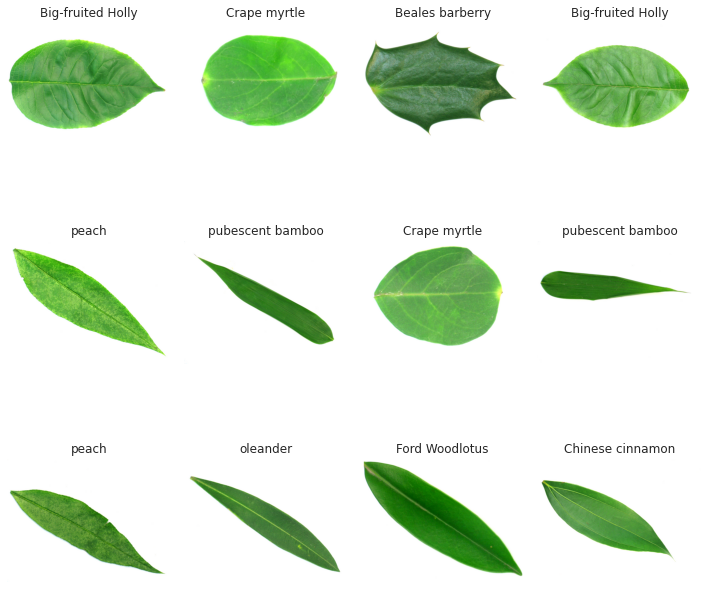

In [ ]:
new_size=(256,256)
img_train,label_train, img_test, label_test=LoadData(dataDir,None)
"""
Some information of the data
"""
print("img for train: %d (Use dictionary creation and training)" % (len(img_train)))
print("label for train: %d" % (len(label_train)))

print("img for test: %d" % (len(img_test)))
print("label for test: %d" % (len(label_test)))

# Randomly display 12 sample images
idxs=np.random.permutation(len(img_train))
plt.figure(figsize = (10,10))
for i in range(12):  # Randomly take 12 samples in train
    idx=idxs[i]
    plt.subplot(3,4, i+1)
    plt.imshow(img_train[idx])
    plt.title(classes[label_train[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()

img for train: 494 (Use dictionary creation and training)
label for train: 494
img for test: 152
label for test: 152


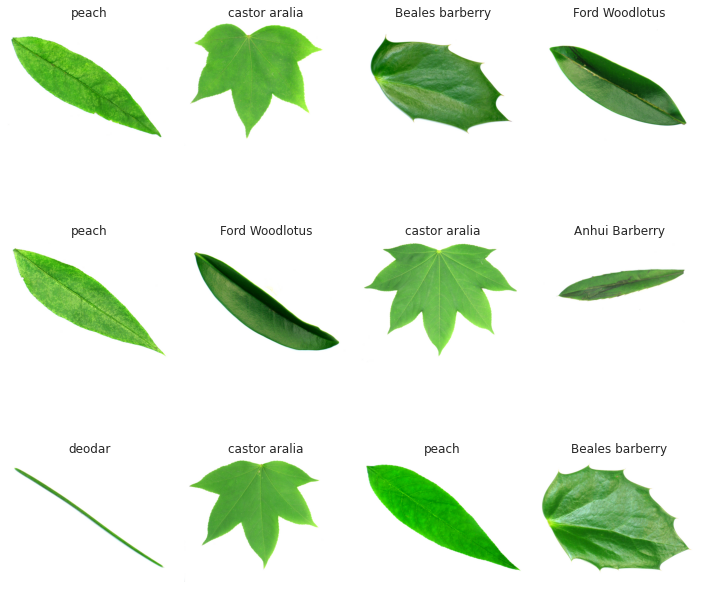

In [ ]:
new_size=(256,256)
img_train,label_train, img_test, label_test=LoadData(dataDir,None)
"""
Some information of the data
"""
print("img for train: %d (Use dictionary creation and training)" % (len(img_train)))
print("label for train: %d" % (len(label_train)))

print("img for test: %d" % (len(img_test)))
print("label for test: %d" % (len(label_test)))

# Randomly display 12 sample images
idxs=np.random.permutation(len(img_train))
plt.figure(figsize = (10,10))
for i in range(12):  # Randomly take 12 samples in train
    idx=idxs[i] 
    plt.subplot(3,4, i+1)
    plt.imshow(img_train[idx])
    plt.title(classes[label_train[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()


## Feature building

Here we will do the following tasks: extract the SIFT feature (SIFT keypoints descriptor), build a dictionary and a Bag-of-Word (BoW) model. Only use the training set

### SIFT or SURF feature extraction (local)

The extract_sift_features () function takes the input of the image list we built from the previous question and returns the list image_descriptors, the pth element in the list image_descriptors is a list containing the SIFT keypoints descriptor corresponding to the pth image in list X.

To initialize the SIFT object in OpenCV we use the command: sift = cv2.xfeatures2d.SIFT_create (). This object has a detectAndCompute method that returns 2 outputs kp and des, kp is a list containing keypoints detected by SIFT, des is a numpy array containing len (kp) 128-dimensional vectors. We will use these des to serve the classification problem.

In [ ]:
def extract_sift_features(X):
    image_descriptors = []
    sift = cv.xfeatures2d.SIFT_create()
    for i in range(len(X)):
        kp, des = sift.detectAndCompute(X[i], None)         
        image_descriptors.append(des)
    return image_descriptors

In [ ]:
# If opencv does not have enough libraries: AttributeError: 'module' object has no attribute 'xfeatures2d'
image_descriptors = extract_sift_features(img_train)


In [ ]:
print(len(image_descriptors))
print(type(image_descriptors[0][0]))
print((image_descriptors[0].shape))
for i in range(10):
    print('Image {} has {} descriptors'.format(i, len(image_descriptors[i])))

494
<class 'numpy.ndarray'>
(166, 128)
Image 0 has 166 descriptors
Image 1 has 119 descriptors
Image 2 has 220 descriptors
Image 3 has 87 descriptors
Image 4 has 146 descriptors
Image 5 has 89 descriptors
Image 6 has 262 descriptors
Image 7 has 128 descriptors
Image 8 has 112 descriptors
Image 9 has 161 descriptors


### Build a dictionary
function kmeans_bow () takes as input a list of all the descriptors of the images in set X and the number of clusters num_clusters, using the KMeans algorithm in scikit-learn to cluster these vector descriptors into cluster num_clusters. The function returns a center list of clusters. Because this operation takes a lot of time, we will save the list returned by the kmeans_bow () function to a binary file (using the pickle library) for easy use later.
We will first build a list containing all the descriptors:

In [ ]:
all_descriptors = []
for descriptors in image_descriptors:
    if descriptors is not None:
        for des in descriptors:
            all_descriptors.append(des)
print('Total number of descriptors: %d' %(len(all_descriptors)))

Total number of descriptors: 479576


Defines the function kmeans_bow ().

Hint: In the sklearn library, to instantiate a kmeans we use the command:
kmeans = sklearn.cluster.KMeans (n_clusters = num_clusters)

The kmeans object has a fit method, takes in data points (in our current problem it is list all_descriptors) and finds out the n_clusters vector is the center of the data clusters. To get these vectors we use the $ cluster_centers_ $ property of the object kmeans

In [ ]:
def kmeans_bow(all_descriptors, num_clusters):
    bow_dict = []
    kmeans = KMeans(n_clusters=num_clusters).fit(all_descriptors)
    bow_dict = kmeans.cluster_centers_
    return bow_dict

In [ ]:
num_clusters = 96
if not os.path.isfile('bow_dictionary96.pkl'):
    BoW = kmeans_bow(all_descriptors, num_clusters)    
    pickle.dump(BoW, open('bow_dictionary96.pkl', 'wb'))
else:
    BoW = pickle.load(open('bow_dictionary96.pkl', 'rb'))
print(len(BoW))
print(len(BoW[0]))

96
128


### Feature vector construction with the obtained BoW model

Construct the create_features_bow () function which takes the input list image_descriptors, list BoW and num_clusters above, returns list X_features, where the p-th element of X_vectors is a feature vector of BoW model corresponding to the p-th image, the keypoint descriptors set. th p. Notice the corresponding elements in the four lists: X_tr, Y_tr, image_descriptors, X_features.

In [ ]:
from scipy.spatial.distance import cdist
def create_features_bow(image_descriptors, BoW, num_clusters):
    X_features = []
    for i in range(len(image_descriptors)):
        features = np.array([0] * num_clusters) # <=> features=np.zeros(num_clusters,dtype=int)        
        if image_descriptors[i] is not None:
            distance = cdist(image_descriptors[i], BoW)            
            argmin = np.argmin(distance, axis=1)            
            for j in argmin:
                features[j] += 1
        X_features.append(features)
    return X_features


#### Create dictionary-based training set

In [ ]:
image_descriptors = extract_sift_features(img_train)
X_tr = create_features_bow(image_descriptors, BoW, num_clusters)
X_tr=np.array(X_tr)
Y_tr=np.array(label_train)
print('Training data')
print("train data: " + str(X_tr.shape))
print("train label: " + str(Y_tr.shape))

Training data
train data: (494, 96)
train label: (494,)


#### Create test set based on dictionary

In [ ]:
image_descriptors = extract_sift_features(img_test)
X_te = create_features_bow(image_descriptors, BoW, num_clusters)
X_te=np.array(X_te)
Y_te=np.array(label_test)
print('Test data')
print("train data: " + str(X_te.shape))
print("train label: " + str(Y_te.shape))

Test data
train data: (152, 96)
train label: (152,)


### Build a classification model based on newly created data
We have built up a feature vector for each image in the data set. In this question we will build SVM classification models

Declare SVM object:

In [ ]:
svm = sklearn.svm.SVC(kernel="linear", C=0.025)
print(svm)

SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Train and test the accuracy of the model similar to the previous lessons (using the functions fit, predict, score, ... of the svm object)

Training model:


In [ ]:
clf = svm.fit(X_tr, Y_tr)

Calculate accuracy on training data set:


In [ ]:
svm.score(X_tr, Y_tr)

1.0

Calculate accuracy on test dataset:

In [ ]:
svm.score(X_te, Y_te)

0.9655172413793104

In [ ]:
y_pred =svm.predict(X_te)
y_pred

array([ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  1,  1,  2,  2,  2,
        2,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  0,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  2,  8,  8,  8,  8,
        9,  9,  9,  9,  9,  0,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

## Use realistic visual prediction trained model

Finally, we will try our trained model to make predictions about a realistic image. We will do the following steps in turn: reading the image, extracting the BoW feature of the image, predicting using the trained model.

__Step 1__: Read the image in the image_test / car.png path, save the image to the variable img


In [ ]:
ls ./Data/oleander/

2547.jpg  2556.jpg  2565.jpg  2574.jpg  2583.jpg  2592.jpg  2601.jpg  2610.jpg
2548.jpg  2557.jpg  2566.jpg  2575.jpg  2584.jpg  2593.jpg  2602.jpg  2611.jpg
2549.jpg  2558.jpg  2567.jpg  2576.jpg  2585.jpg  2594.jpg  2603.jpg  2612.jpg
2550.jpg  2559.jpg  2568.jpg  2577.jpg  2586.jpg  2595.jpg  2604.jpg
2551.jpg  2560.jpg  2569.jpg  2578.jpg  2587.jpg  2596.jpg  2605.jpg
2552.jpg  2561.jpg  2570.jpg  2579.jpg  2588.jpg  2597.jpg  2606.jpg
2553.jpg  2562.jpg  2571.jpg  2580.jpg  2589.jpg  2598.jpg  2607.jpg
2554.jpg  2563.jpg  2572.jpg  2581.jpg  2590.jpg  2599.jpg  2608.jpg
2555.jpg  2564.jpg  2573.jpg  2582.jpg  2591.jpg  2600.jpg  2609.jpg


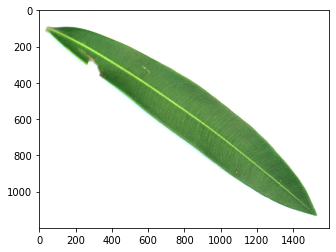

In [ ]:
img = None
img = cv.imread('./Data/oleander/2577.jpg')
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
my_X = [img]

__Step 2__: Extract the SIFT feature (save to variable my_image_descriptors) and BoW (save to variable my_X_features) from my_X:

In [ ]:
my_image_descriptors = None
my_X_features = None
my_image_descriptors = extract_sift_features(my_X)
my_X_features = create_features_bow(my_image_descriptors, BoW, num_clusters)
print(len(my_image_descriptors))
print(my_image_descriptors[0].shape)
print(my_X_features[0].shape)
print(my_X_features[0])

1
(1042, 128)
(96,)
[  2   1  16   0  22   2  11   8   1  13   2   4   1  30  54   2   2   7
   4   2   3   4  26   9   0   3   8  14   1   0   2  17   0  10   3   1
   3   7  10  10   1   7   8   3   5   9   2   2   1   0   3  17   1   6
  41   0   8   2 111   0   0   1  76   8   4   5 184  24   1  21   5   2
   8   3  13  17   1   7   6   3   3   8   7   3   6   1   2  20   3   0
   6   3   3  26  18   2]


__Step 3:__ Using the trained model to predict, the prediction result is stored in the variable my_y_pred

In [ ]:
y_pred = None
y_pred = svm.predict(my_X_features)
print(y_pred)
print('Type: ' + classes[y_pred[0]])



[5]
Type: oleander


In [ ]:
confusion = confusion_matrix(Y_te, y_pred)
confusion

array([[21,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  0,  0,  1,  0,  0,  1,  0],
       [ 2,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18]])

In [ ]:
import pandas as pd


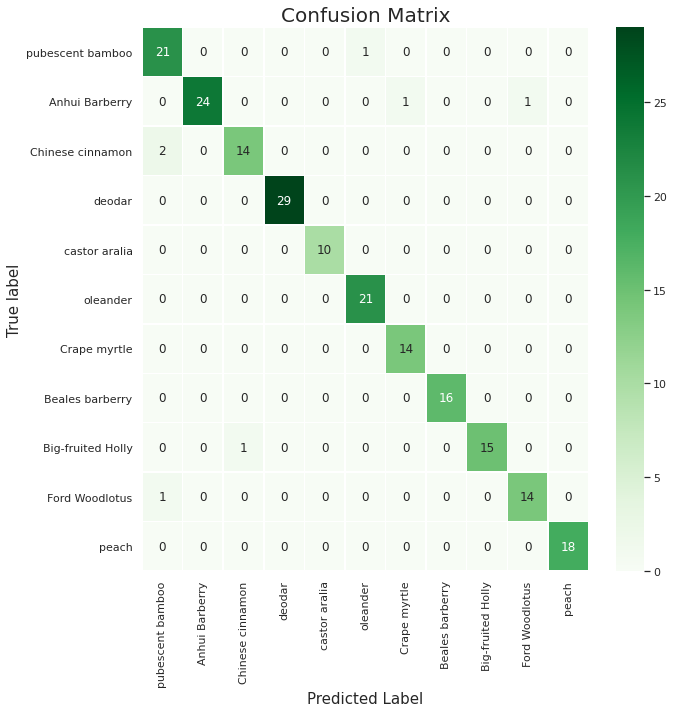

<Figure size 432x288 with 0 Axes>

In [ ]:
df_cm = pd.DataFrame(confusion, index = classes,
              columns = classes)

plt.figure(figsize = (10,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.heatmap(df_cm, annot=True, cmap="Greens", linewidths=.5)
plt.xlabel('Predicted Label', fontsize = 15) 
plt.ylabel('True label', fontsize = 15) 
plt.show()
plt.savefig('matr')

In [ ]:

  # # Prédiction du type de plante
  # y_pred = clf.predict([img_histogram[0]])
  # print()
  # plt.imshow(img)
  # plt.title('La classe prédite est : {}'.format(class_name[y_pred[0]]))
  # plt.show()